# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
10110001 - Asep Suherlan</br>
10110002 - Budi Suaep

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan signifikan dalam jumlah penyewa sepeda antara musim panas, musim gugur, musim dingin, dan musim semi? 
- Bagaimana cuaca mempengaruhi jumlah penyewa sepeda ?
- Apakah ada perbedaan signifikan dalam pola penyewaan antara hari kerja dan akhir pekan ?
- jam berapakah banyaknya penyewa ?

## Menyaipkan semua library yang dibuthkan

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [151]:
dataBike = pd.read_csv('./data/Bike-sharing-dataset/day.csv')
dataBikeHour = pd.read_csv('./data/Bike-sharing-dataset/hour.csv')


### Assessing Data

#### data 5 teratas

In [152]:
display(dataBike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### info data

In [153]:
display(dataBikeHour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [154]:
display(dataBike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

In [155]:
display(dataBikeHour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

#### statistik deskriktif dalam numerik

In [156]:
display(dataBike.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [157]:
display(dataBikeHour.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### data null

In [158]:
print(dataBike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [159]:
print(dataBikeHour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### data duplicate

In [160]:
print('Data Duplicate : ',dataBike.duplicated().sum())

Data Duplicate :  0


In [161]:
print('Data Duplicate : ',dataBikeHour.duplicated().sum())

Data Duplicate :  0


### Cleaning Data

### karena tidak ada yang kosong dan tidak ada yang duplicate jadi tidak perlu di cleaning data lagi

## Exploratory Data Analysis (EDA)

### Explore ...

In [162]:
dataBike['dteday'] = pd.to_datetime(dataBike['dteday'])
dataBike['bulan'] = dataBike['dteday'].dt.to_period('M')

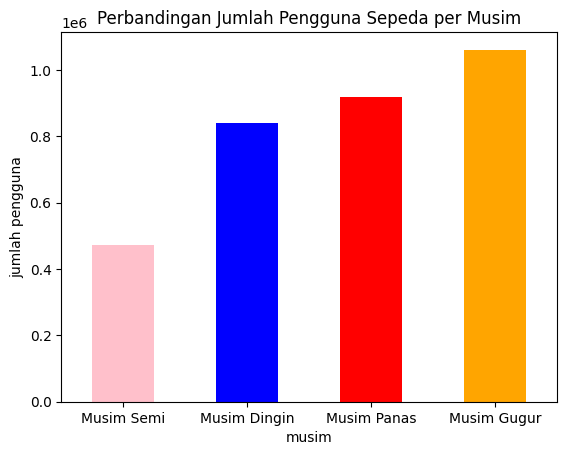

In [163]:
dataBike['musim'] = dataBike['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})
dataMusim = dataBike.groupby('musim')['cnt'].sum()

dataMusim.sort_values().plot(kind='bar',color=['pink', 'blue', 'red', 'orange'] )
plt.title('Perbandingan Jumlah Pengguna Sepeda per Musim')
plt.xlabel('musim')
plt.ylabel('jumlah pengguna')
plt.xticks(rotation= 0)
plt.show()

In [164]:
dataMusimSemi = dataBike[dataBike['musim'] == 'Musim Semi']
jumlahCuacaMusimSemi = dataMusimSemi.groupby('weathersit')['cnt'].sum()



dataMusimDingin = dataBike[dataBike['musim'] == 'Musim Dingin']
jumlahCuacaMusimDingin = dataMusimDingin.groupby('weathersit')['cnt'].sum()

dataMusimPanas = dataBike[dataBike['musim'] == 'Musim Panas']
jumlahCuacaMusimPanas = dataMusimPanas.groupby('weathersit')['cnt'].sum()

dataMusimGugur = dataBike[dataBike['musim'] == 'Musim Gugur']
jumlahCuacaMusimGugur = dataMusimGugur.groupby('weathersit')['cnt'].sum()

for i in range(1,5):
    if i not in jumlahCuacaMusimSemi.index:
        jumlahCuacaMusimSemi[i] = 0
    if i not in jumlahCuacaMusimDingin.index:
        jumlahCuacaMusimDingin[i] = 0
    if i not in jumlahCuacaMusimPanas.index:
        jumlahCuacaMusimPanas[i] = 0
    if i not in jumlahCuacaMusimGugur.index:
        jumlahCuacaMusimGugur[i] = 0

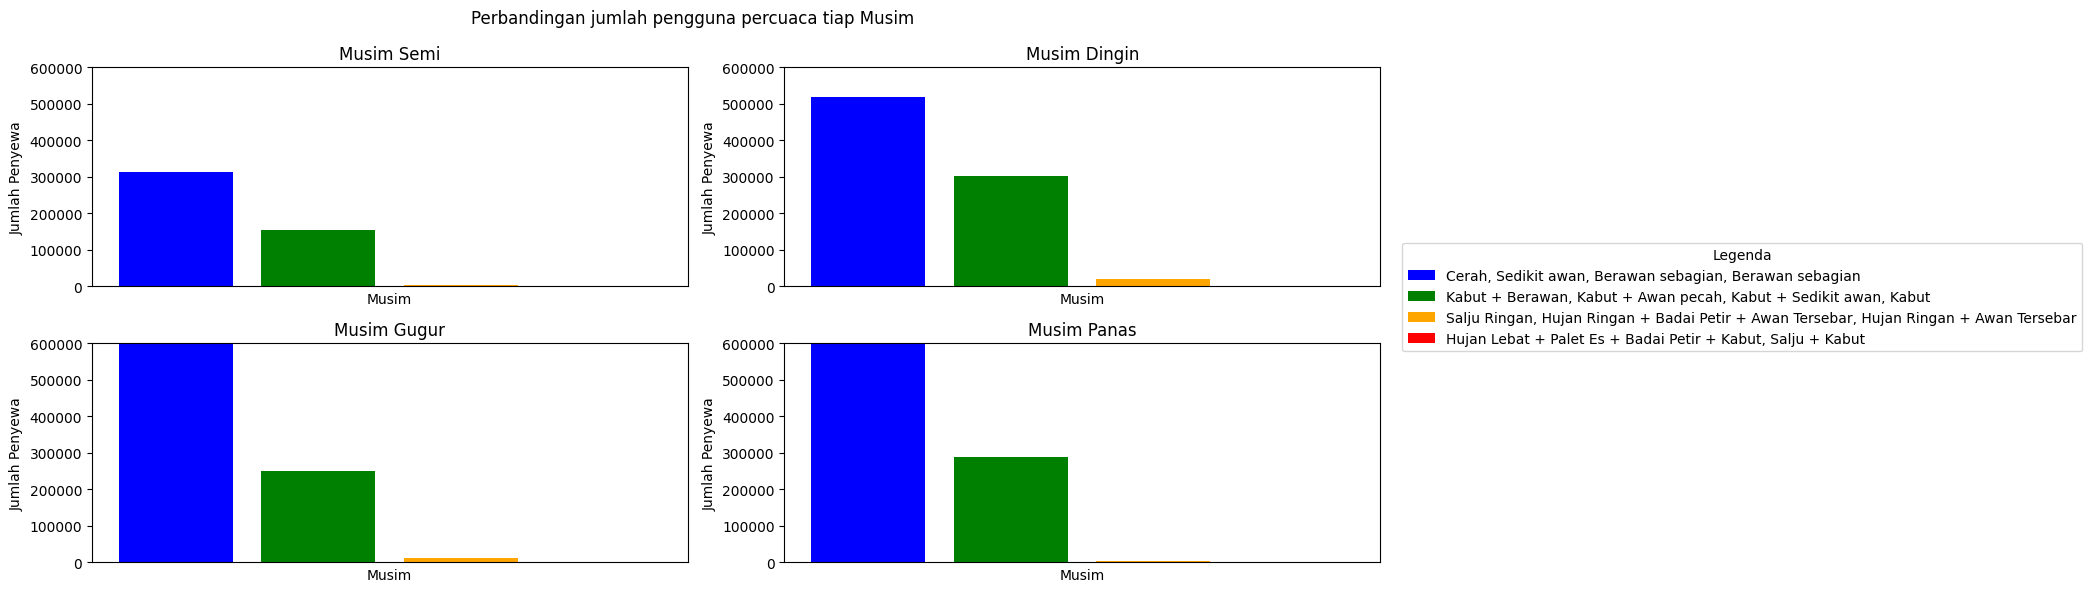

In [165]:



labelCuaca = jumlahCuacaMusimSemi.index.map({1: 'Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian', 2: 'Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut', 3: 'Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar', 4: 'Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut'}).tolist()

# Membagi gambar menjadi dua subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig.suptitle('Perbandingan jumlah pengguna percuaca tiap Musim ')

# Menampilkan subplot pertama (diagram batang untuk perbandingan jumlah penyewa)
axes[0 , 0].bar(jumlahCuacaMusimSemi.index.astype(str), jumlahCuacaMusimSemi, color=['blue', 'green', 'orange', 'red'] ,label=labelCuaca)
axes[0 , 0].set_title('Musim Semi')
axes[0 , 0].set_xlabel('Musim')
axes[0 , 0].set_ylabel('Jumlah Penyewa')
axes[0 , 0].set_ylim([0, 600000])  # Mengatur batas sumbu y
axes[0 , 0].set_xticks([])
# axes[0].legend(loc='upper right')  # Menambahkan legenda

# Menampilkan subplot kedua (diagram batang untuk perbandingan jumlah penyewa hanya untuk musim semi)
axes[0, 1].bar(jumlahCuacaMusimDingin.index.astype(str), jumlahCuacaMusimDingin, color=['blue', 'green', 'orange', 'red'])
axes[0, 1].set_title('Musim Dingin')
axes[0, 1].set_xlabel('Musim')
axes[0, 1].set_ylabel('Jumlah Penyewa')
axes[0, 1].set_ylim([0, 600000])  # Mengatur batas sumbu y
axes[0, 1].set_xticks([])

axes[1, 0].bar(jumlahCuacaMusimGugur.index.astype(str), jumlahCuacaMusimGugur, color=['blue', 'green', 'orange', 'red'])
axes[1, 0].set_title('Musim Gugur')
axes[1, 0].set_xlabel('Musim')
axes[1, 0].set_ylabel('Jumlah Penyewa')
axes[1, 0].set_ylim([0, 600000])  # Mengatur batas sumbu y
axes[1, 0].set_xticks([])

axes[1, 1].bar(jumlahCuacaMusimPanas.index.astype(str), jumlahCuacaMusimPanas, color=['blue', 'green', 'orange', 'red'])
axes[1, 1].set_title('Musim Panas')
axes[1, 1].set_xlabel('Musim')
axes[1, 1].set_ylabel('Jumlah Penyewa')
axes[1, 1].set_ylim([0, 600000])  # Mengatur batas sumbu y
axes[1, 1].set_xticks([])

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legenda')
plt.subplots_adjust(right=0.85)

# Menyesuaikan tata letak dan menampilkan gambar
plt.tight_layout()
plt.show()


In [166]:
dataBike['Hari'] = dataBike['dteday'].dt.day_name()
dataBike['Tipe Hari'] = dataBike['Hari'].apply(lambda x : 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


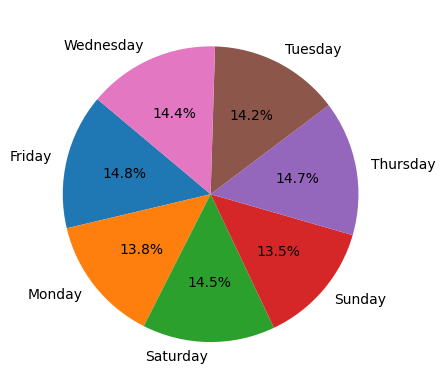

In [167]:
dataPerHari = dataBike.groupby('Hari')['cnt'].sum()
plt.pie(dataPerHari, labels=dataPerHari.index ,   autopct='%1.1f%%', startangle=140)
plt.show()


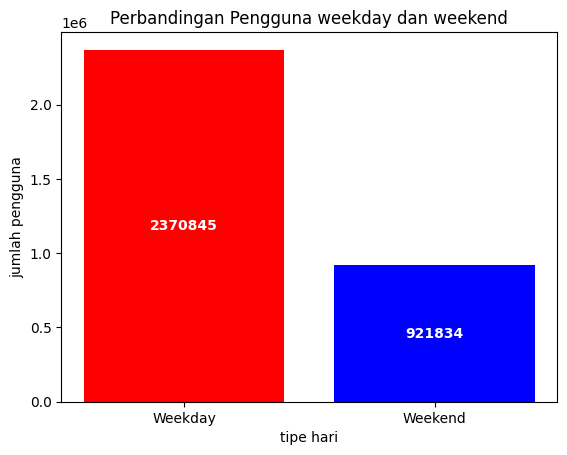

In [168]:
dataTipeHari = dataBike.groupby('Tipe Hari')['cnt'].sum()

plt.bar(dataTipeHari.index, dataTipeHari, color=['red','blue'])
plt.title('Perbandingan Pengguna weekday dan weekend')
plt.xlabel('tipe hari')
plt.ylabel('jumlah pengguna')

for i , value in enumerate(dataTipeHari):
    plt.text(i,value/2, str(value), ha='center',va='center', color="white", fontweight='bold')

plt.show()

In [179]:
dataBikeHour['jam'] = dataBikeHour['hr'].apply(lambda x : f"{x:02d}:00")

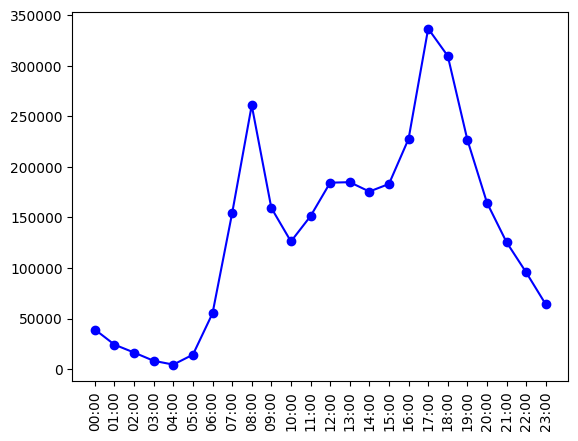

In [195]:
dataHour = dataBikeHour.groupby('jam')['cnt'].sum()
plt.plot(dataHour.index, dataHour , marker='o', linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.show()

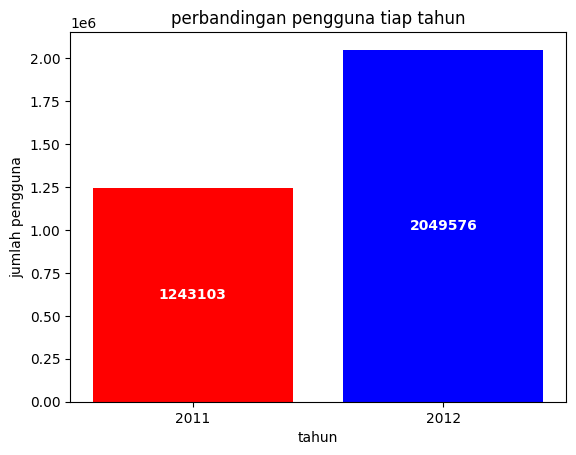

In [203]:
dataBike['tahun']= dataBike['dteday'].dt.year
dataPertahun = dataBike.groupby('tahun')['cnt'].sum()

plt.bar(dataPertahun.index.astype(str), dataPertahun, color=['red','blue'])
plt.title('perbandingan pengguna tiap tahun')
plt.xlabel('tahun')
plt.ylabel('jumlah pengguna')

for i , value in enumerate(dataPertahun):
    plt.text(i,value/2, str(value), ha='center',va='center', color="white", fontweight='bold')


plt.show()

### statistik pengguna terdaptar perbulan

In [169]:
dataTerdaptar = dataBike.groupby('bulan')['registered'].sum()

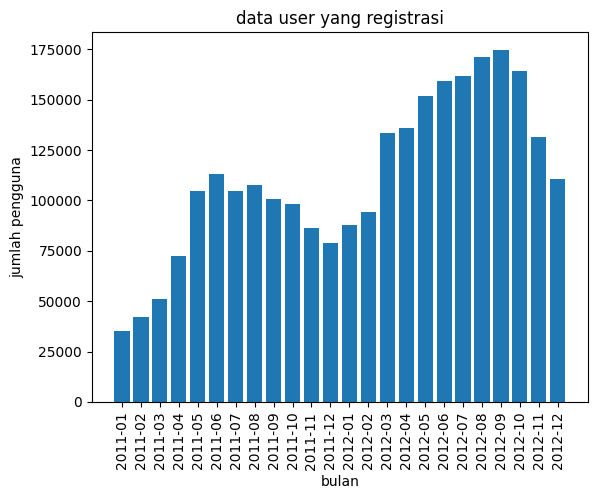

In [170]:
plt.bar(dataTerdaptar.index.astype(str), dataTerdaptar)
plt.xticks(rotation = 90)
plt.title('data user yang registrasi')
plt.xlabel('bulan')
plt.ylabel('jumlah pengguna')
plt.show()

### data user biasa

In [171]:
dataBiasa = dataBike.groupby('bulan')['casual'].sum()

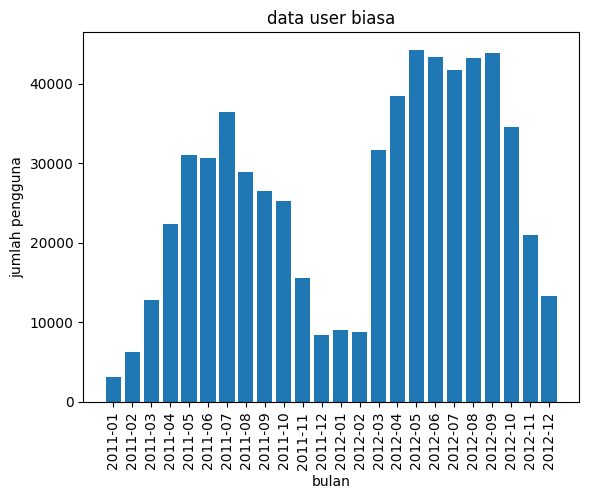

In [172]:
plt.bar(dataBiasa.index.astype(str), dataBiasa)
plt.xticks(rotation = 90)
plt.title('data user biasa')
plt.xlabel('bulan')
plt.ylabel('jumlah pengguna')
plt.show()

### data pengguna casual dan yang sudah daftar

In [173]:
dataSemua = dataBike.groupby('bulan')['cnt'].sum()

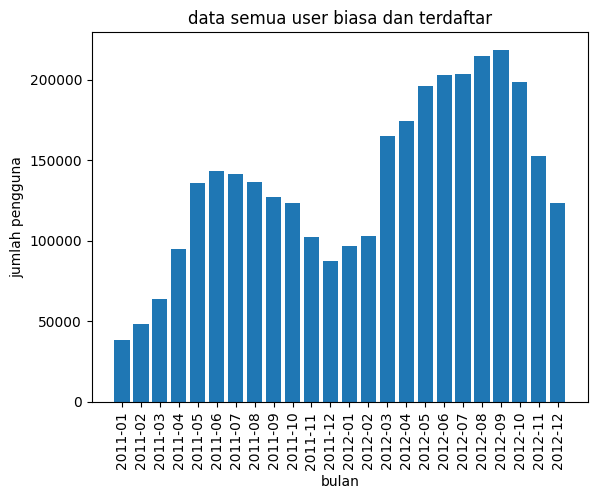

In [174]:
plt.bar(dataSemua.index.astype(str), dataSemua)
plt.title('data semua user biasa dan terdaftar')
plt.xticks(rotation = 90)
plt.xlabel('bulan')
plt.ylabel('jumlah pengguna')
plt.show()


### data semua pengguna permusim

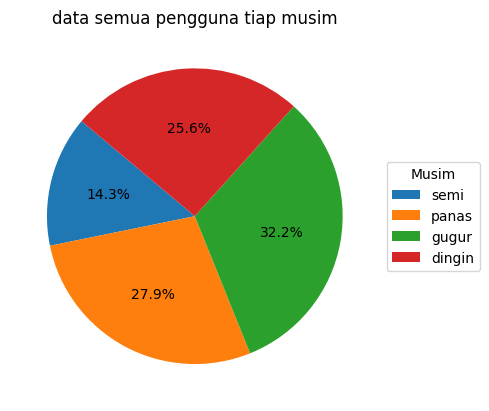

In [175]:
dataMusim = dataBike.groupby('season')['cnt'].sum()
labelMusim = {1:'semi',2:'panas',3:'gugur',4:'dingin'}

# validasi data kosong
for i in range(1,5):
    if i not in dataMusim.index:
        dataMusim[i] = 0
        
plt.pie(dataMusim,  autopct='%1.1f%%', startangle=140)
plt.title('data semua pengguna tiap musim')
plt.legend(labels=[labelMusim.get(i,i) for i in dataMusim.index],  loc='center left', bbox_to_anchor=(1, 0.5), title='Musim')
plt.show()

### data semua pengguna tiap cuaca

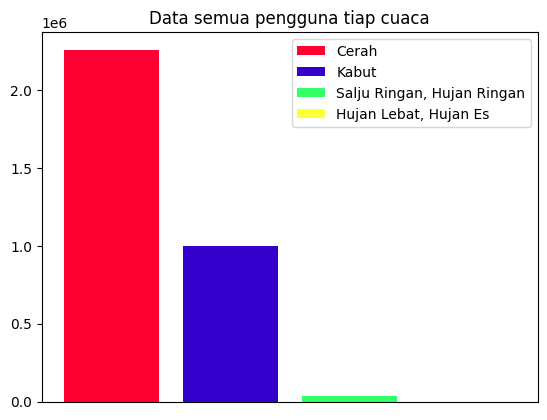

In [176]:
dataCuaca = dataBike.groupby('weathersit')['cnt'].sum()
labelCuaca = ['Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian','Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut','Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar','Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut']
dataCuaca1 = dataBike.groupby('weathersit')['cnt'].sum()
# validasi data kosong

for i in range(1,5):
    if i not in dataCuaca.index: 
        dataCuaca.loc[i] = 0
        

        

# plt.pie(dataCuaca, labels=None, startangle=140 , autopct=lambda p: '{:.1f}%'.format(p) if p != 0 else '' if p is not None else '')
plt.bar(dataCuaca.index.astype(str), dataCuaca, color=['#FF0033','#3300CC','#33FF66','#FFFF33'] ,label=['Cerah','Kabut','Salju Ringan, Hujan Ringan','Hujan Lebat, Hujan Es'])
plt.title('Data semua pengguna tiap cuaca')




# Menambahkan legenda di luar diagram pie dan memisahkannya
plt.legend()
plt.xticks([])



plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

### Pertanyaan 2: 

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2
- conclution pertanyaan 3